<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.134890,95.014456,0.179222,153.328568,153.160912,0.167655
1,0.0,1.0,87.730299,34.934150,-0.288430,132.376019,132.519697,-0.143677
2,0.0,2.0,90.012108,43.110230,0.515478,143.637816,142.953841,0.683975
3,0.0,3.0,90.096557,57.652156,-0.084521,157.664193,157.561308,0.102885
4,0.0,4.0,77.203510,27.571853,0.109393,114.884756,114.701716,0.183039
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.182467,91.171012,1.498694,167.852173,166.721577,1.130596
29996,999.0,26.0,34.135651,53.587304,-0.046158,97.676797,97.551351,0.125446
29997,999.0,27.0,56.899831,47.949430,0.318641,115.167902,114.717739,0.450163
29998,999.0,28.0,48.759052,65.308105,-2.660640,121.406516,124.085674,-2.679158


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.134890  95.014456  0.179222  153.328568  153.160912  0.167655
      1.0    87.730299  34.934150 -0.288430  132.376019  132.519697 -0.143677
      2.0    90.012108  43.110230  0.515478  143.637816  142.953841  0.683975
      3.0    90.096557  57.652156 -0.084521  157.664193  157.561308  0.102885
      4.0    77.203510  27.571853  0.109393  114.884756  114.701716  0.183039
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.182467  91.171012  1.498694  167.852173  166.721577  1.130596
      26.0   34.135651  53.587304 -0.046158   97.676797   97.551351  0.125446
      27.0   56.899831  47.949430  0.318641  115.167902  114.717739  0.450163
      28.0   48.759052  65.308105 -2.660640  121.406516  124.085674 -2.679158
      29.0   93.823370  81.561800  0.885838  186.271008  185.776742  0.494265

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.134890  95.014456  0.179222  153.328568  153.160912  0.167655
      1.0    87.730299  34.934150 -0.288430  132.376019  132.519697 -0.143677
      2.0    90.012108  43.110230  0.515478  143.637816  142.953841  0.683975
      3.0    90.096557  57.652156 -0.084521  157.664193  157.561308  0.102885
      4.0    77.203510  27.571853  0.109393  114.884756  114.701716  0.183039
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.182467  91.171012  1.498694  167.852173  166.721577  1.130596
      26.0   34.135651  53.587304 -0.046158   97.676797   97.551351  0.125446
      27.0   56.899831  47.949430  0.318641  115.167902  114.717739  0.450163
      28.0   48.759052  65.308105 -2.660640  121.406516  124.085674 -2.679158
      29.0   93.823370  81.561800  0.885838  186.271008  185.776742  0.494265

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.134890,95.014456,0.179222,153.328568,153.160912,0.167655
1,0.0,1.0,87.730299,34.934150,-0.288430,132.376019,132.519697,-0.143677
2,0.0,2.0,90.012108,43.110230,0.515478,143.637816,142.953841,0.683975
3,0.0,3.0,90.096557,57.652156,-0.084521,157.664193,157.561308,0.102885
4,0.0,4.0,77.203510,27.571853,0.109393,114.884756,114.701716,0.183039
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.182467,91.171012,1.498694,167.852173,166.721577,1.130596
29996,999.0,26.0,34.135651,53.587304,-0.046158,97.676797,97.551351,0.125446
29997,999.0,27.0,56.899831,47.949430,0.318641,115.167902,114.717739,0.450163
29998,999.0,28.0,48.759052,65.308105,-2.660640,121.406516,124.085674,-2.679158


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.134890  95.014456  0.179222  153.328568  153.160912  0.167655
      1.0    87.730299  34.934150 -0.288430  132.376019  132.519697 -0.143677
      2.0    90.012108  43.110230  0.515478  143.637816  142.953841  0.683975
      3.0    90.096557  57.652156 -0.084521  157.664193  157.561308  0.102885
      4.0    77.203510  27.571853  0.109393  114.884756  114.701716  0.183039
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.182467  91.171012  1.498694  167.852173  166.721577  1.130596
      26.0   34.135651  53.587304 -0.046158   97.676797   97.551351  0.125446
      27.0   56.899831  47.949430  0.318641  115.167902  114.717739  0.450163
      28.0   48.759052  65.308105 -2.660640  121.406516  124.085674 -2.679158
      29.0   93.823370  81.561800  0.885838  186.271008  185.776742  0.494265

[30000 rows x 6 columns]

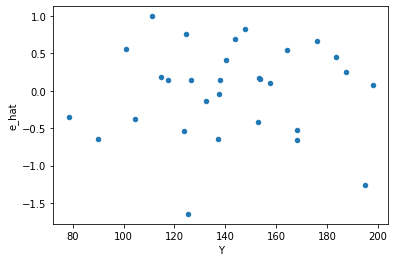

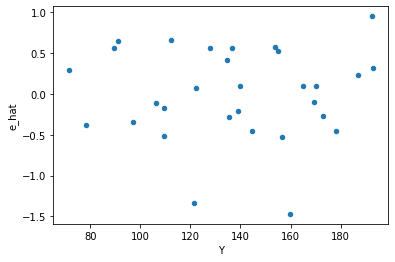

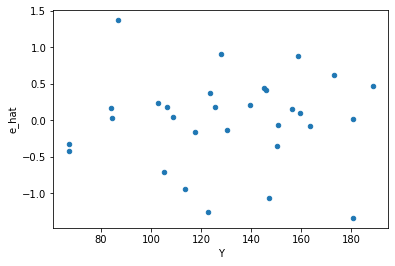

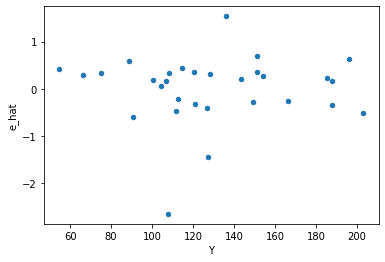

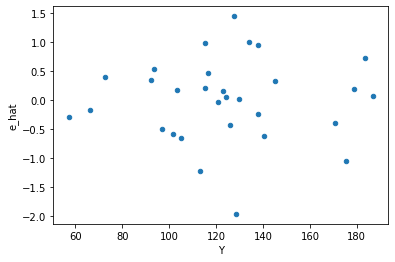

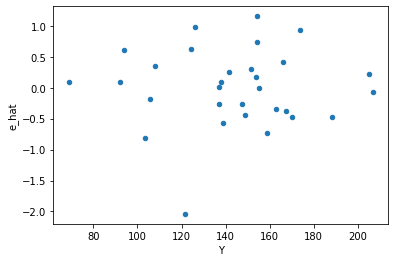

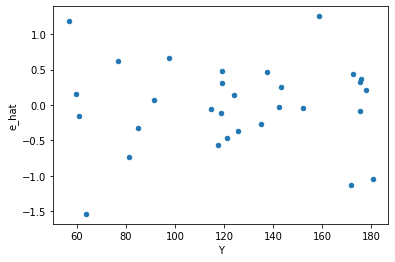

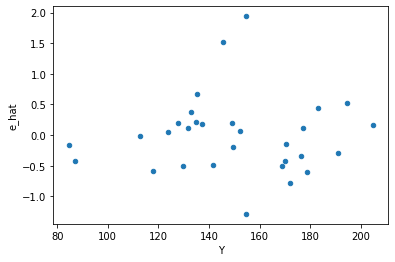

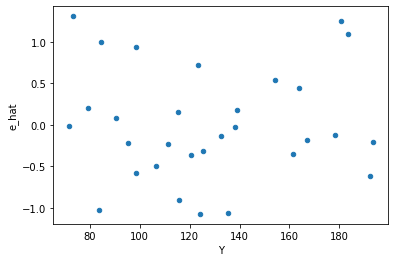

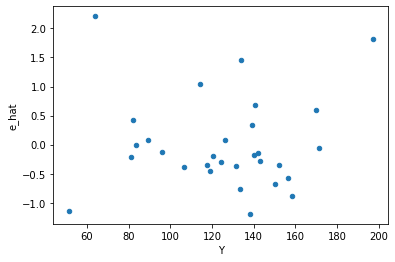

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,15.0,3.356121245857806,6.445706351835725,0.30510193144161873,0.4297137567890484,1.408426864945213,0.5278864985475153,0.7360567507262423,0.2639432492737577,Reject001=1 : Homoscedasticity
2.0,12.0,14.0,4.809450509472608,6.246621699386559,0.4007875424560507,0.44618726424189703,1.1132762797656686,0.8384890754790755,0.5807554622604623,0.41924453773953774,Reject001=1 : Homoscedasticity
3.0,9.0,17.0,1.2084158773047387,13.154378245448111,0.13426843081163764,0.7737869556145948,5.762985021401823,0.001982532943862747,0.9990087335280686,0.0009912664719313735,Reject001=0 : Heteroscedasticity
5.0,19.0,7.0,4.8580666397957115,6.309044267920884,0.2556877178839848,0.901292038274412,3.5249719686706356,0.09498584214880612,0.9525070789255969,0.04749292107440306,Reject001=1 : Homoscedasticity
8.0,16.0,10.0,6.5688600311915035,4.5929588159817945,0.41055375194946897,0.45929588159817947,1.1187228941819771,0.8825248490039428,0.5587375754980286,0.4412624245019714,Reject001=1 : Homoscedasticity
9.0,20.0,6.0,11.181568449157059,6.143480819819188,0.5590784224578529,1.0239134699698647,1.8314308491257398,0.46562997634065684,0.7671850118296716,0.23281498817032842,Reject001=1 : Homoscedasticity
14.0,13.0,13.0,6.935586898687976,10.519045806999106,0.5335066845144597,0.809157369769162,1.5166770975054789,0.4629349008339325,0.7685325495830337,0.23146745041696626,Reject001=1 : Homoscedasticity
19.0,13.0,13.0,3.2024971336480776,5.787962864810758,0.24634593335754443,0.44522791267775064,1.8073280391097448,0.298652853879243,0.8506735730603785,0.1493264269396215,Reject001=1 : Homoscedasticity
20.0,20.0,6.0,5.146302685687415,2.293855106537463,0.25731513428437075,0.3823091844229105,1.4857625280618088,0.654597649460581,0.6727011752697095,0.3272988247302905,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,15.0,3.356121245857806,6.445706351835725,0.30510193144161873,0.4297137567890484,1.408426864945213,0.5278864985475153,Reject001=1 : Homoscedasticity
1.0,10.0,16.0,3.446885205874425,5.06806256673384,0.3446885205874425,0.316753910420865,0.9189569466399131,0.9199028354206457,Reject001=1 : Homoscedasticity
2.0,12.0,14.0,4.809450509472608,6.246621699386559,0.4007875424560507,0.44618726424189703,1.1132762797656686,0.8384890754790755,Reject001=1 : Homoscedasticity
3.0,9.0,17.0,1.2084158773047387,13.154378245448111,0.13426843081163764,0.7737869556145948,5.762985021401823,0.001982532943862747,Reject001=0 : Heteroscedasticity
4.0,21.0,5.0,12.482822185653944,2.0004289367180337,0.5944201040787592,0.4000857873436067,0.6730690711810049,0.4732351796661448,Reject001=1 : Homoscedasticity
5.0,19.0,7.0,4.8580666397957115,6.309044267920884,0.2556877178839848,0.901292038274412,3.5249719686706356,0.09498584214880612,Reject001=1 : Homoscedasticity
6.0,7.0,19.0,4.925040303190396,5.76360459365917,0.7035771861700566,0.3033476101925879,0.4311504354538123,0.2588454065395011,Reject001=1 : Homoscedasticity
7.0,17.0,9.0,8.571949175854302,0.5749593050034811,0.5042323044620177,0.06388436722260901,0.12669629981516034,0.00030264656124885696,Reject001=0 : Heteroscedasticity
8.0,16.0,10.0,6.5688600311915035,4.5929588159817945,0.41055375194946897,0.45929588159817947,1.1187228941819771,0.8825248490039428,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      912
Reject001=0 : Heteroscedasticity     88
Name: Result_test, dtype: int64